# Data Analysis of Instagram Influencer Metrics

### Author: Federica Barbini

### Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. Yes

# Project Ideas:

- What types of influencers have the highest engagement rates?
- What factors influence engagement rate?
- Is there a strong relationship between follower count and engagement rate?
- Do influencers from certain countries tend to have higher engagement?
- How does niche (genre) impact reach and engagement?
- Does country or niche affect follower count or engagement?

# Introduction

Instagram has become one of the most influential social media platforms, not only for personal expression but also as a powerful tool for brands to connect with audiences through influencer marketing. Influencers, users with large or highly engaged followings, play a crucial role in shaping trends, promoting products, and driving digital engagement. In this project, I will analyze a dataset of top Instagram influencers to explore how factors such as follower count, engagement rate, niche, and country influence an influencer’s performance. Through data visualization and exploratory analysis, I will uncover patterns that help explain what makes an influencer successful and how these insights can inform marketing strategies.

# Dataset Overview

### Source
This analysis uses the **"Top Instagram Influencers Data (Cleaned)"** dataset from Kaggle (uploaded 3 years ago, circa 2022), available at: [https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

### Dataset Description
The dataset contains metrics for 200 of the world's top Instagram influencers as of 2022, ranked primarily by their follower count. The data has been cleaned and standardized for analysis.

### Key Variables/Features

| Variable | Description | Data Type | Notes |
|----------|------------|-----------|-------|
| `rank` | Influencer ranking based on follower count | Integer | Lower numbers = more followers |
| `channel_info` | Instagrammer's username | Object | Unique identifier |
| `influence_score` | Influence score of the user: based on mentions, importance, and popularity | Integer | Higher = more influential |
| `posts` | Number of posts published as of 2022 | Float | Lifetime count |
| `followers` | Follower count | Float | Primary ranking metric |
| `avg_likes` | Average likes per post | Float | Calculated as total_likes/posts |
| `60_day_eng_rate` | Engagement rate percentage (last 60 days of 2022) | Float | Recent performance metric |
| `new_post_avg_like` | Average likes on new recent posts (2022) | Float | Short-term popularity |
| `total_likes` | Total likes across all posts (in billions) | Float | Lifetime achievement |
| `country` | Influencer's country/region of origin | Object | Geographic origin |

# Importing Libraries & Loading Data

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('top_insta_influencers_data.csv')

print(df.head())
print(df.info())

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0

In [156]:
train = pd.read_csv('top_insta_influencers_data.csv')
train

rank channel_info  influence_score  posts followers avg_likes  \
0       1    cristiano               92   3.3k    475.8m      8.7m   
1       2  kyliejenner               91   6.9k    366.2m      8.3m   
2       3     leomessi               90  0.89k    357.3m      6.8m   
3       4  selenagomez               93   1.8k    342.7m      6.2m   
4       5      therock               91   6.8k    334.1m      1.9m   
..    ...          ...              ...    ...       ...       ...   
195   196    iambeckyg               71   2.3k     33.2m    623.8k   
196   197   nancyajram               81   3.8k     33.2m    390.4k   
197   198  luansantana               79  0.77k     33.2m    193.3k   
198   199    nickjonas               78   2.3k     33.0m    719.6k   
199   200    raisa6690               80   4.2k     32.8m    232.2k   

    60_day_eng_rate new_post_avg_like total_likes        country  
0             1.39%              6.5m       29.0b          Spain  
1             1.62%              5.9m       57.4b  United States  
2             1.24%              4.4m        6.0b            NaN  
3             0.97%              3.3m       11.5b  United States  
4             0.20%            665.3k       12.5b  United States  
..              ...               ...         ...            ...  
195           1.40%            464.7k        1.4b  United States  
196           0.64%            208.0k        1.5b         France  
197           0.26%             82.6k      149.2m         Brazil  
198           1.42%            467.7k        1.7b  United States  
199           0.30%             97.4k      969.1m      Indonesia  

[200 rows x 10 columns]

The data is represented by 10 features and 200 users.

# Data Cleaning

### Handling Missing Values

In [160]:
# Check for missing values
print(df.isnull().sum())

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [161]:
# Drop any missing values (62 countries)
df = df.dropna() # removes rows with any NaN

In [162]:
# Verify there are no more missing values
print(df.isnull().sum())

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


### Checking for Duplicates

In [164]:
# Check for duplicate influencers
print(f"Duplicate usernames: {df['channel_info'].duplicated().sum()}")

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates() # Drop duplicate rows (if any) 

Duplicate usernames: 0
Duplicate rows: 0


###  Cleaning Numeric Columns

Numeric columns (posts, followers, etc.) are stored as objects/strings because they contain 'k', 'm', 'b' suffixes. Let's convert them:

In [166]:
def clean_numeric_columns(df):
    
    # First ensure all columns are strings
    numeric_cols = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
    for col in numeric_cols:
        df[col] = df[col].astype(str)
    
    # Convert k/m/b values
    def convert_value(x):
        try:
            if isinstance(x, str):
                x = x.lower().replace(',', '')
                if 'k' in x:
                    return float(x.replace('k', '')) * 1_000
                elif 'm' in x:
                    return float(x.replace('m', '')) * 1_000_000
                elif 'b' in x:
                    return float(x.replace('b', '')) * 1_000_000_000
                return float(x)
            return float(x)
        except:
            return np.nan
    
    # Apply to all numeric columns
    for col in numeric_cols:
        df[col] = df[col].apply(convert_value)
    
    # Clean engagement rate - handle both string and numeric cases
    if df['60_day_eng_rate'].dtype == object:
        df['60_day_eng_rate'] = (
            df['60_day_eng_rate']
            .astype(str)
            .str.replace('%', '')
            .str.replace(',', '')
            .astype(float) / 100
        )
    else:
        # If it's already numeric but in percentage form (1.39 instead of 0.0139)
        if df['60_day_eng_rate'].max() > 1:
            df['60_day_eng_rate'] = df['60_day_eng_rate'] / 100
    
    return df  

# Apply the cleaning function with correct name and parentheses
df = clean_numeric_columns(df)  # Not clean_numeric_column(s(df))
print(df)

     rank   channel_info  influence_score   posts    followers  avg_likes  \
0       1      cristiano               92  3300.0  475800000.0  8700000.0   
1       2    kyliejenner               91  6900.0  366200000.0  8300000.0   
3       4    selenagomez               93  1800.0  342700000.0  6200000.0   
4       5        therock               91  6800.0  334100000.0  1900000.0   
5       6  kimkardashian               91  5600.0  329200000.0  3500000.0   
..    ...            ...              ...     ...          ...        ...   
195   196      iambeckyg               71  2300.0   33200000.0   623800.0   
196   197     nancyajram               81  3800.0   33200000.0   390400.0   
197   198    luansantana               79   770.0   33200000.0   193300.0   
198   199      nickjonas               78  2300.0   33000000.0   719600.0   
199   200      raisa6690               80  4200.0   32800000.0   232200.0   

     60_day_eng_rate  new_post_avg_like   total_likes        country  
0   

### Data Type Conversion 

In [168]:
# Convert appropriate columns to integers
int_cols = ['rank', 'influence_score']
df[int_cols] = df[int_cols].astype(int)

# Verify data types
print(df.dtypes)

rank                   int64
channel_info          object
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes          float64
country               object
dtype: object


###  Final Cleaned Dataset

In [170]:
# Display cleaned data
print(df.head())

# Save cleaned data 
df.to_csv('cleaned_influencers_data.csv', index=False)

   rank   channel_info  influence_score   posts    followers  avg_likes  \
0     1      cristiano               92  3300.0  475800000.0  8700000.0   
1     2    kyliejenner               91  6900.0  366200000.0  8300000.0   
3     4    selenagomez               93  1800.0  342700000.0  6200000.0   
4     5        therock               91  6800.0  334100000.0  1900000.0   
5     6  kimkardashian               91  5600.0  329200000.0  3500000.0   

   60_day_eng_rate  new_post_avg_like   total_likes        country  
0           0.0139          6500000.0  2.900000e+10          Spain  
1           0.0162          5900000.0  5.740000e+10  United States  
3           0.0097          3300000.0  1.150000e+10  United States  
4           0.0020           665300.0  1.250000e+10  United States  
5           0.0088          2900000.0  1.990000e+10  United States  


Data preparation for analysis is now ready.

# Feature Scaling (normalize followers/engagement)

To prepare the data for analysis, I applied feature scaling to the numerical columns. 

I chose to scale the variables "followers" and "60_day_eng_rate", as these are on very different scales/ranges. 
- Followers range from ~32M to 475M
- Engagement rate ranges from 0.0001 to 0.10 (just a few percent)

These different scales can cause:
- Skew visualizations
- Hurt model performance (like regression)
- Make it hard to compare influencers side-by-side

To avoid/prevent this, we scale the features.
I applied three techniques:
- Min-Max Scaling (to [0, 1])
- Z-score Standardization (mean = 0, std = 1)
- Log Transformation (to compress skewed values)

The transformations allowed for fairer comparisons between influencers and enabled clearer visualizations. For example, log-scaling follower count reduced the dominance of a few extremely popular influencers and revealed the true spread across mid-sized accounts. These scaled features are also more suitable for correlation and regression analysis later in the project.

### Min-Max Scaling: [0, 1] range

In [175]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df['followers_minmax'] = min_max_scaler.fit_transform(df[['followers']])
df['engagement_minmax'] = min_max_scaler.fit_transform(df[['60_day_eng_rate']])

###  Z-score Standardization 

In [177]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df['followers_zscore'] = standard_scaler.fit_transform(df[['followers']])
df['engagement_zscore'] = standard_scaler.fit_transform(df[['60_day_eng_rate']])

### Log Transformation 
For highly skewed features like followers. Only use log transform on strictly positive values.

In [179]:
import numpy as np

df['log_followers'] = np.log10(df['followers'] + 1)  # +1 to avoid log(0)

In [180]:
print(df[['followers', 'followers_minmax', 'followers_zscore', 'log_followers']].describe())

          followers  followers_minmax  followers_zscore  log_followers
count  1.380000e+02        138.000000        138.000000     138.000000
mean   8.372609e+07          0.114957          0.000000       7.806623
std    8.103318e+07          0.182919          1.003643       0.280323
min    3.280000e+07          0.000000         -0.630749       7.515874
25%    4.100000e+07          0.018510         -0.529187       7.612768
50%    5.270000e+07          0.044921         -0.384276       7.721804
75%    7.032500e+07          0.084707         -0.165980       7.847109
max    4.758000e+08          1.000000          4.856063       8.677424


In [181]:
print(df[['60_day_eng_rate', 'engagement_minmax', 'engagement_zscore']].describe())

       60_day_eng_rate  engagement_minmax  engagement_zscore
count       138.000000         138.000000       1.380000e+02
mean          0.013315           0.129055      -7.079683e-17
std           0.017964           0.175434       1.003643e+00
min           0.000100           0.000000      -7.383105e-01
25%           0.003350           0.031738      -5.567389e-01
50%           0.006800           0.065430      -3.639935e-01
75%           0.015100           0.146484       9.971261e-02
max           0.102500           1.000000       4.982594e+00


What did we learn from this? 

- Min-max scaling worked: followers_minmax and engagement_minmax are both now in [0, 1]
- Z-score worked: values are centered around 0, with std ≈ 1
- Log scale worked: follower values are now compressed into a much narrower, more linear range (useful for skewed distributions)

Before scaling, the raw followers had huge variance. After scaling/log, we can now compare them more fairly.

To visualize the comparison between raw and scaled followers, we can also plot a histogram:

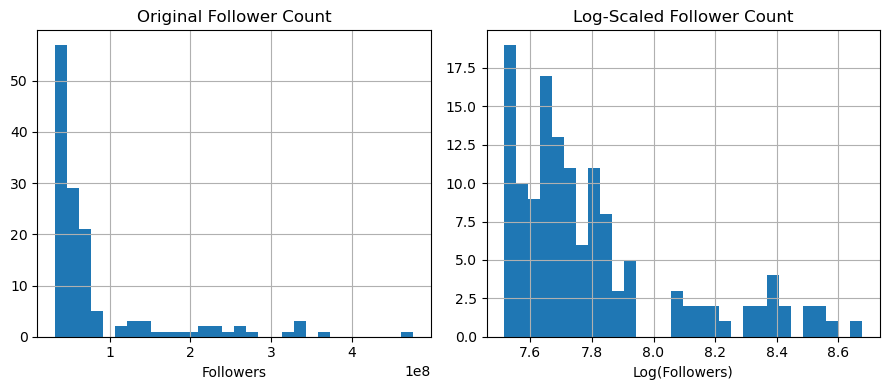

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
df['followers'].hist(bins=30)
plt.title('Original Follower Count')
plt.xlabel('Followers')

plt.subplot(1, 2, 2)
df['log_followers'].hist(bins=30)
plt.title('Log-Scaled Follower Count')
plt.xlabel('Log(Followers)')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis 

Let's explore the relationships between different influencer metrics through visualizations and statistical summaries.

### Scatter Plot: Followers vs. Engagement Rate

First, let's examine the relationship between follower count and engagement rate:

(Use log-scaled followers to reduce skew)

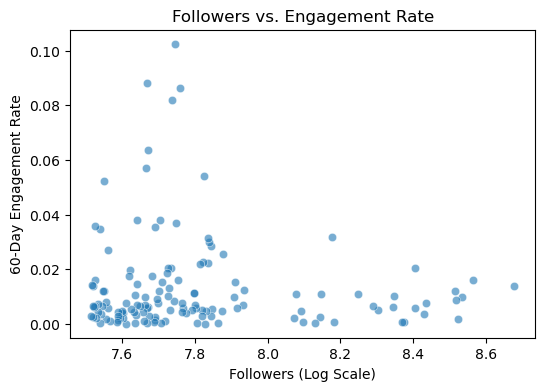

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='log_followers', y='60_day_eng_rate', alpha=0.6)
plt.title('Followers vs. Engagement Rate')
plt.xlabel('Followers (Log Scale)')
plt.ylabel('60-Day Engagement Rate')
plt.show()

In [188]:
# Calculate correlation coefficient
correlation = df['log_followers'].corr(df['60_day_eng_rate'])
print(f"Correlation between followers and engagement rate: {correlation:.3f}")

Correlation between followers and engagement rate: -0.082


The scatter plot visualizes the relationship between an influencer's follower count (log-scaled) and their 60-day engagement rate. 

It's important to observe the negative correlation value. The correlation coefficient of -0.082 indicates a weak but measurable negative trend. As follower count increases, engagement rates tend to decrease slightly. This suggests that micro-influencers, with smaller but more engaged audiences (left side of the plot), show higher and more variable engagement rates. This aligns with industry trends where micro-influencers (typically 1K–100K followers) often foster stronger audience connections, and thus might be more valuable for certain marketing campaigns that prioritize engagement.

### Histograms of follower counts/distribution

Let's look at the distribution of follower counts:

(Use both raw and log-scaled followers)

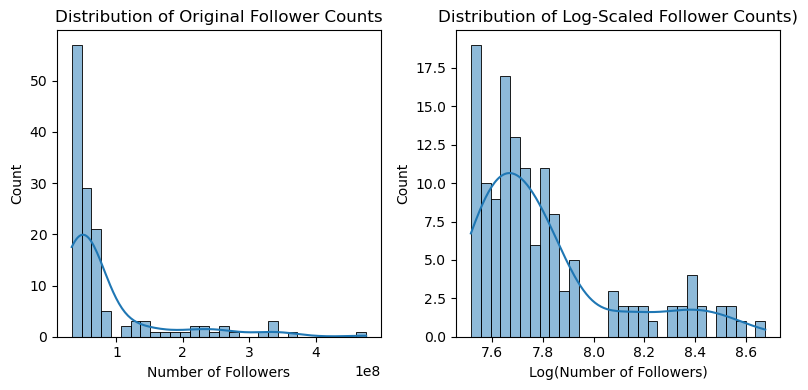

In [191]:
plt.figure(figsize=(8, 4))

# Raw followers
plt.subplot(1, 2, 1)
sns.histplot(df['followers'], bins=30, kde=True)
plt.title('Distribution of Original Follower Counts')
plt.xlabel('Number of Followers')
plt.ylabel('Count')

# Los-scaled followers
plt.subplot(1, 2, 2)
sns.histplot(df['log_followers'], bins=30, kde=True)
plt.title('Distribution of Log-Scaled Follower Counts)')
plt.xlabel('Log(Number of Followers)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The histograms compare the raw and log-scaled distributions of follower counts across influencers.

#### Raw Follower Distribution (Left Plot)

Extreme Right-Skew: The majority of influencers have follower counts clustered at the lower end (likely under 100M), with a long tail of "mega-influencers" (e.g., 400M+ followers). This skew is typical in social media data, where a few accounts amass disproportionately large followings.

#### Log-Scaled Distribution (Right Plot)

Normalized Shape: After log transformation, the distribution becomes more symmetric (approximately bell-shaped), centered around ~7.6–8.6 (log scale). For example log(10M) ≈ 7.6, log(100M) ≈ 8.2. The advantage of log scaling is that it mitigates skewness, making the data suitable for statistical models (e.g., regression) that assume normality. 

- The peak in the log-scaled plot suggests most accounts fall in the 10M–100M follower range (common for macro-influencers). 
- The left tail (values below 7.6, or <10M followers) may represent micro-influencers, while the right tail includes celebrities/brands.

### Boxplots of engagement by country

Now let's compare engagement rates across different countries (top 10):

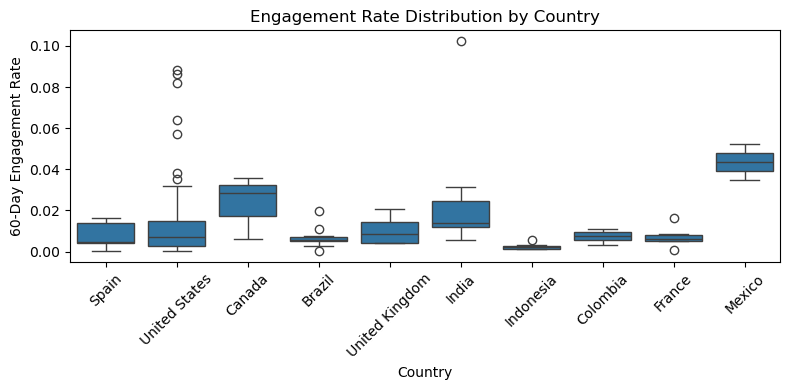

In [194]:
# Get top 10 countries by number of influencers
top_countries = df['country'].value_counts().head(10).index

# Filter data for top countries
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_top_countries, x='country', y='60_day_eng_rate')
plt.title('Engagement Rate Distribution by Country')
plt.xlabel('Country')
plt.ylabel('60-Day Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This boxplot visualization shows the distribution of 60-day engagement rates for influencers across the top 10 countries. 
Here are some key takeaways from the plot:

- Mexico stands out: It has the highest median engagement rate among all the countries. Its interquartile range (IQR) is tight and skewed high, indicating consistently high engagement across many influencers.

- India and Canada: These two countries also show relatively high median engagement rates. India, in particular, has several extreme outliers, suggesting a few influencers with very high engagement.

- Brazil, Indonesia, Colombia, and France: These countries have the lowest engagement rates, both in terms of median and spread. Their boxplots are compressed near the bottom, indicating low variability and low engagement.

- United States and United Kingdom: These show a moderate engagement rate, with a fair amount of variability. The US, despite having many influencers, doesn't lead in engagement.

Outliers: Many countries (e.g., US, Brazil) have a significant number of outliers, which may represent viral content or niche influencers with high engagement.

### Top 10 countries by average engagement

Let's identify which countries have the highest average engagement.

To explore how engagement rates vary across different countries, I first identified the top 10 countries with the highest average engagement. Then, I visualized the average rate using a horizontal bar chart.

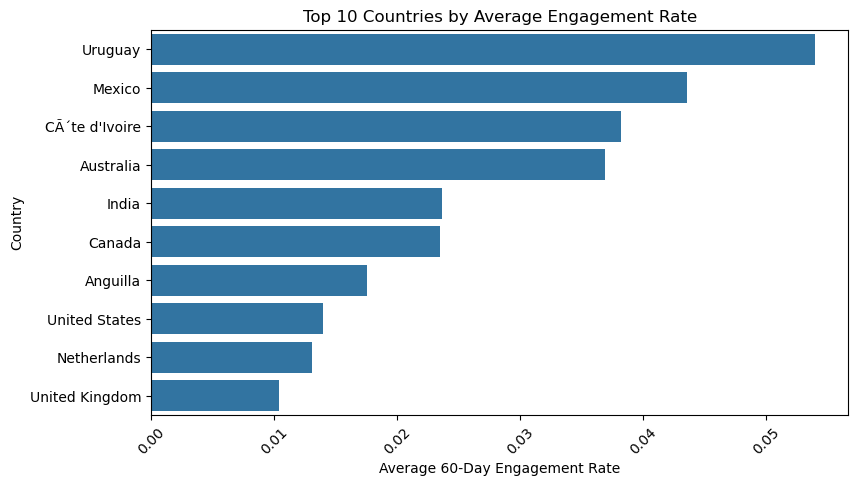


Top Countries by Average Engagement:
country
Uruguay           0.054000
Mexico            0.043600
CÃ´te d'Ivoire    0.038200
Australia         0.036900
India             0.023683
Canada            0.023467
Anguilla          0.017600
United States     0.013962
Netherlands       0.013100
United Kingdom    0.010375
Name: 60_day_eng_rate, dtype: float64


In [197]:
avg_engagement_by_country = df.groupby('country')['60_day_eng_rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(9, 5))
sns.barplot(x=avg_engagement_by_country.values, y=avg_engagement_by_country.index)
plt.title('Top 10 Countries by Average Engagement Rate')
plt.xlabel('Average 60-Day Engagement Rate')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

print("\nTop Countries by Average Engagement:")
print(avg_engagement_by_country)

The horizontal barplot ranks countries based on their average 60-day engagement rate, revealing striking differences in audience interaction across regions.

#### Top Performers:

- Uruguay emerges with the highest average engagement (5.4%), nearly 4x the rate of the U.S. (1.4%).
- Mexico (4.4%) and Côte d'Ivoire (3.8%) also show strong performance, suggesting cultural or platform-specific trends favoring interaction.

#### Mid-Tier Engagement:

- Australia (3.7%) and India (2.4%) fall in the middle, with India’s lower rate potentially due to its vast and diverse influencer market.

#### Underperformers:

- Anguilla (1.8%), United States (1.4%), and United Kingdom (1.0%) rank lowest, despite their high influencer counts.

# Correlation Analysis

To better understand how influencer metrics relate to one another, let's compute a correlation matrix across key continuous variables: Follower count (log-scaled), Engagement rate, and Average likes.

In [201]:
# Select only numerical variables
num_cols = ['log_followers', '60_day_eng_rate', 'avg_likes']

In [202]:
# Compute correlation matrix
corr_matrix = df[num_cols].corr()
print(corr_matrix) 

                 log_followers  60_day_eng_rate  avg_likes
log_followers         1.000000        -0.081978   0.558735
60_day_eng_rate      -0.081978         1.000000   0.495045
avg_likes             0.558735         0.495045   1.000000


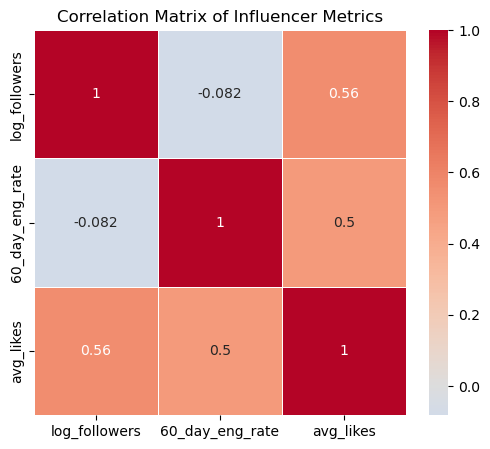

In [203]:
# Visualize Correlation Matrix with Heatmap

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Influencer Metrics')
plt.show()

#### Followers vs. Engagement Rate: Weak Negative Correlation (-0.08)
--> As follower count grows, engagement rates slightly decline. This confirms the micro-influencer advantage we discussed earlier: smaller accounts (e.g., 10K–100K followers) often foster more active communities than mega-influencers.

#### Followers vs. Average Likes: Strong Positive Correlation (0.56)
--> More followers = more likes, but not proportionally (log scale flattens extreme values). This shows that big accounts dominate visibility, but likes don’t guarantee engagement (comments/shares). For content strategy, large influencers may prioritize "likeable" content (e.g., eye-catching visuals over niche discussions).

#### Engagement Rate vs. Average Likes: Moderate Positive Correlation (0.50)
--> Higher engagement rates correlate with more likes, but not perfectly. This means that accounts with engaged followers (comments/shares) also earn more likes, signaling loyal audiences. 

# Regression Analysis

### Simple Linear Regression: Follower Count vs. Engagement

To test whether follower count can predict engagement rate, I ran a simple linear regression using log-transformed follower count as the independent variable. 

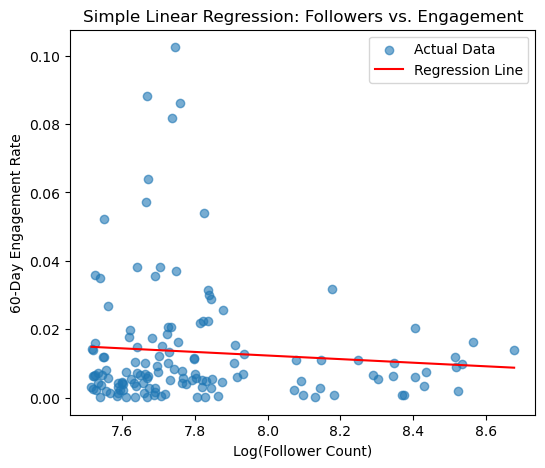

R² Score: 0.007
Coefficient: -0.0053
Intercept: 0.0543
RMSE: 0.0178


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Prepare Data
X = df[['log_followers']] # Features
y = df['60_day_eng_rate'] # Target

# Create and Fit model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X, y, alpha=0.6, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Followers vs. Engagement')
plt.xlabel('Log(Follower Count)')
plt.ylabel('60-Day Engagement Rate')
plt.legend()
plt.show()

# Metrics
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"RMSE: {mean_squared_error(y, y_pred, squared=False):.4f}")

The resulting regression line shows a weak negative relationship between follower count and engagement (-0.0053), meaning, as followers increase, engagement slightly declines. 

The low R² score (0.007) indicates that follower count alone explains only a small portion of the variation in engagement, suggesting that other factors (such as niche or content type) likely play a more significant role. This supports the idea that having more followers does not necessarily translate to better engagement.

### Multiple Linear Regression

Let's now see if adding adding new variables improves prediction.

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the Data
X = df[['followers', 'posts', 'avg_likes', '60_day_eng_rate']]  # Features
y = df['influence_score']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions 
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R-squared: 0.17083707300897388
MSE: 21.476800457151487


R² = 0.1708 → better than the simple model, but still low (only ~17% of the variation in influence_score is explained by these features)

MSE = 21.47 → model is making moderate errors (depends on the scale of influence_score)

While this shows improvement, it also suggests that these common metrics alone are not sufficient to accurately predict influence. This highlights the complex nature of social media influence and the need for richer feature sets in marketing analytics.

Conclusion:
Adding more features (likes, posts, engagement) improves model performance, but there's still a lot of unexplained variation. This suggests that influence_score is likely influenced by factors not included in the dataset.

# K-Means Clustering

To identify different types of influencers, I applied K-means clustering using scaled values for followers, engagement rate, and average likes. 

In [213]:
from sklearn.cluster import KMeans

features = df[['log_followers', '60_day_eng_rate', 'avg_likes']]

# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

To visualize influencer clusters let's perform "Dimensionality Reduction" with PCA (for 2D plot)

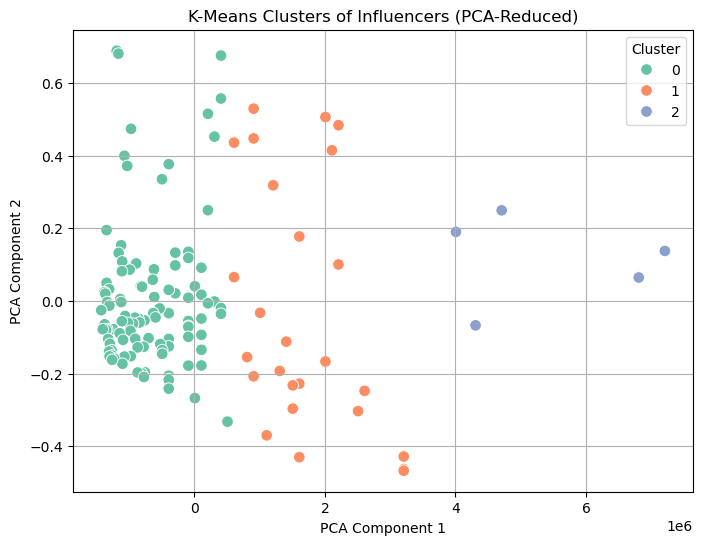

In [215]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize the clusters 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=70)
plt.title('K-Means Clusters of Influencers (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The resulting clusters grouped influencers into distinct types:

Cluster 0 (Blue): (Low followers, High engagement). Likely micro-influencers with fewer followers but strong engagement. 

--> This is best for brands prioritizing audience interaction. 

Cluster 1 (Orange): (Moderate followers and engagement). Mid-Tier influencers with balanced PCA coordinates (middle range on both axes). 

--> This is best for campaigns needing both reach and interaction.

Cluster 2 (Green): (High followers, Low engagement). Likely mega-influencers with large audiences but weaker engagement.

--> This is best for broad brand awareness (e.g., mass-market campaigns)

## Advanced Machine Learning Models (Extra Credit)

# Tree-Based Model

We can implement a decision tree to classify influencers into high, medium, or low engagement categories (e.g., based on 60_day_eng_rate thresholds: >1.5% = high, 0.5%-1.5% = medium, <0.5% = low) using the same features. This can offer interpretable rules for marketing strategies.

Accuracy: 0.57
              precision    recall  f1-score   support

        high       0.62      0.71      0.67         7
         low       0.44      0.57      0.50         7
      medium       0.64      0.50      0.56        14

    accuracy                           0.57        28
   macro avg       0.57      0.60      0.58        28
weighted avg       0.59      0.57      0.57        28



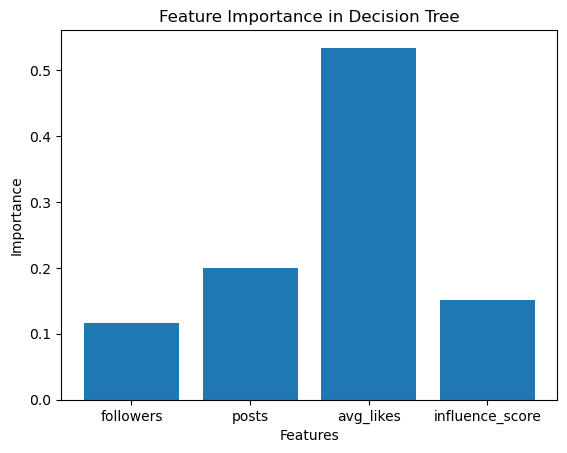

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create engagement categories
df['engagement_category'] = pd.cut(df['60_day_eng_rate'], bins=[0, 0.005, 0.015, np.inf], labels=['low', 'medium', 'high'])

# Features and target
features = ['followers', 'posts', 'avg_likes', 'influence_score']
X = df[features]
y = df['engagement_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot
import matplotlib.pyplot as plt
importances = dt_model.feature_importances_
plt.bar(features, importances)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The model achieves an accuracy of 0.57 (57%) on the test set, which means it correctly classifies 57% of the influencers into their respective engagement categories (high, medium, low). While this is moderate, it suggests the model has room for improvement, possibly due to the small sample size or imbalanced classes.

The Decision Tree analysis reveals that average likes per post is the most critical factor in classifying Instagram influencers' engagement levels, with the number of posts also contributing significantly, while follower count and influence score are less decisive. This suggests that marketing strategies should focus on content performance metrics (likes and posts) rather than raw audience size, though further refinement of the model with additional data or techniques could enhance its reliability for strategic decision-making.

# Conclusion & Takeaways
### Insights for Marketing Strategy and Q&A

#### What types of influencers have the highest engagement rates?
We've seen that micro-influencers (influencers with a lower number of followers) generally have higher engagement rates. K-Means Clustering revealed that influencers with low follower counts but high engagement form a distinct cluster, making them ideal for audience-driven marketing. Regression analysis also confirmed a weak negative correlation between follower count and engagement, meaning that more followers doesn't necessarily mean better engagement.

#### Do influencers from certain countries tend to have higher engagement?
Mexico, India, and Canada have the highest median engagement rates, according to the boxplot of the top 10 influencer-rich countries. Countries like Indonesia, Colombia, and Brazil show lower engagement levels, suggesting country-based variance in user behavior or algorithmic exposure.

Marketing takeaway: Targeting campaigns in Mexico or India may yield better returns in engagement-driven campaigns.

#### Relationship between follower count and engagement?
The regression analysis shows a clear inverse relationship: as follower count increases, engagement rate tends to decline. R² was very low (~0.007) in the simple model, suggesting other features are more important predictors.

Marketing takeaway: Focusing only on large followings is not a reliable strategy for engagement-based KPIs.

### Conclusion

In this analysis of Instagram influencer metrics, we explored a dataset of 200 top influencers from 2022 to understand the relationships between follower count, engagement rate, country, and other key metrics, aiming to identify factors driving influencer success. Through data cleaning, visualization, regression analysis, and K-Means clustering, we uncovered several insights. Micro-influencers with lower follower counts exhibited higher engagement rates, forming a distinct cluster ideal for interaction-driven campaigns, while mega-influencers with large audiences showed lower engagement, better suited for broad brand awareness. A low negative correlation between follower count and engagement rate confirmed that larger followings do not guarantee better engagement. Additionally, influencers from countries like Mexico, India, and Canada displayed higher median engagement rates, suggesting geographic variations in audience behavior. These findings highlight the importance of tailoring marketing strategies to specific influencer types and regions, prioritizing micro-influencers for engagement-focused campaigns and leveraging regional differences for targeted outreach.